In [1]:
import pandas as pd
from modules.exp_data_analysis import ExpDataAnalysis
from modules.data_clean import CleanData
from modules.kmeans_cluster import KMeansCluster
from modules.reg_models import RegModel
from modules.cls_models import ClsModel
from modules.helpers import Helper
import numpy as np

/home/jovan/Desktop/laptop-data/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Task 1 - Exploratory Data Analysis

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


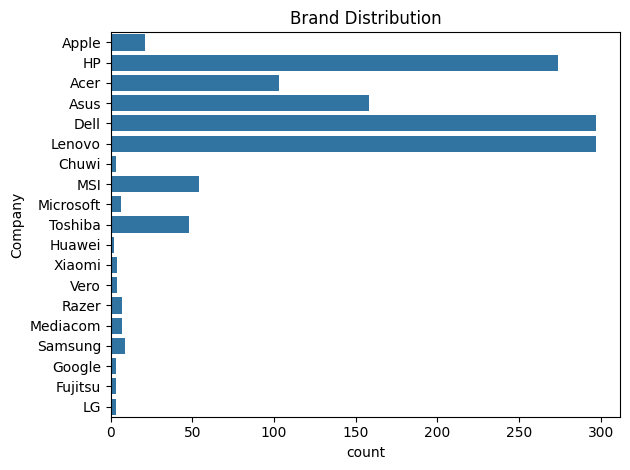

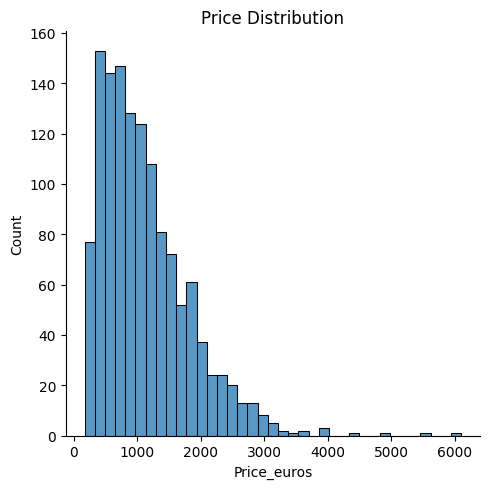

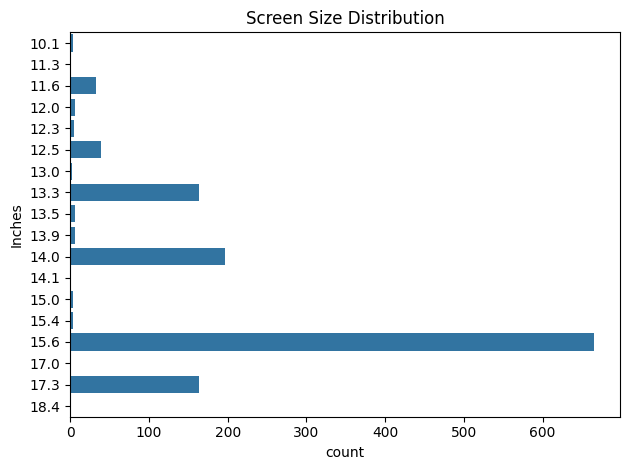

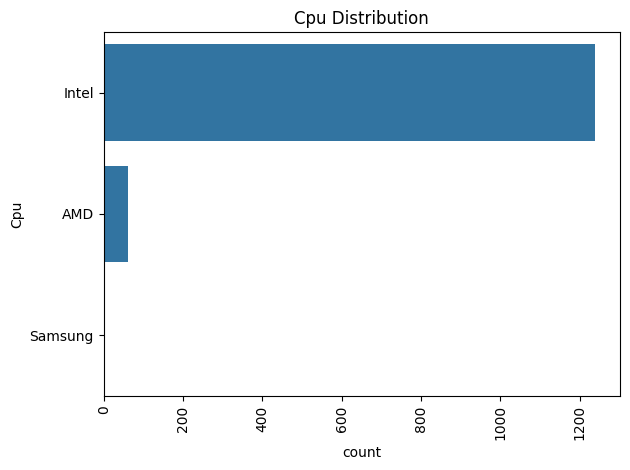

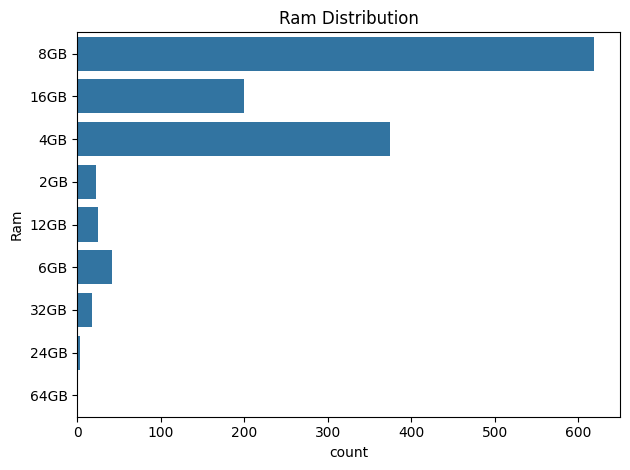

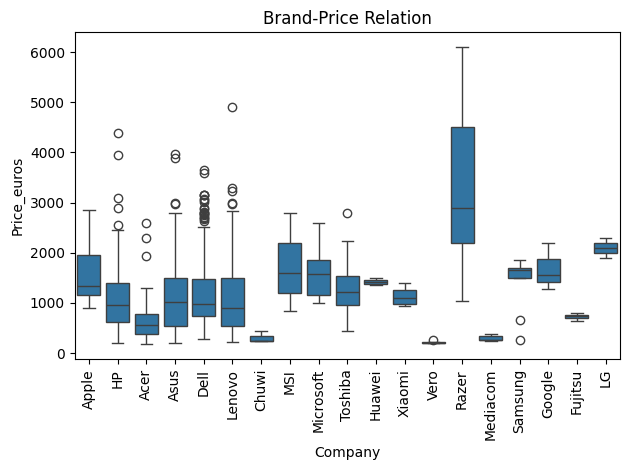

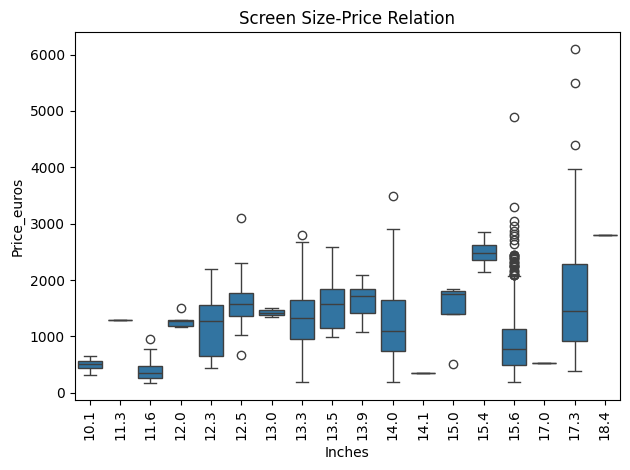

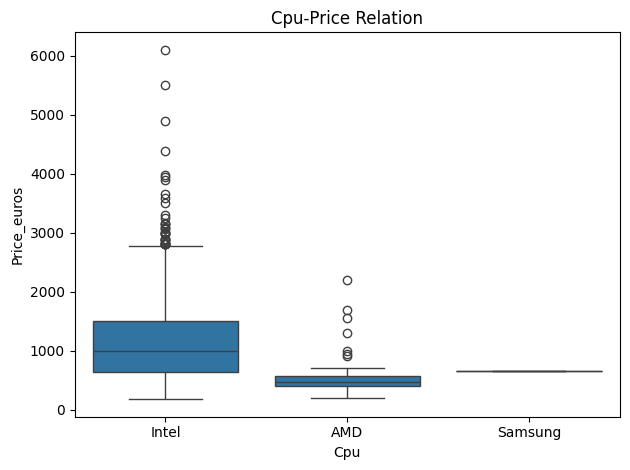

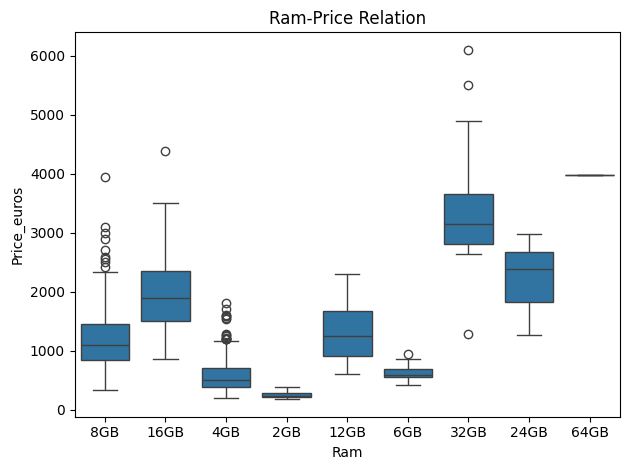

            Inches          Ram       Memory  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000
mean     15.017191     8.382195   434.948580  1123.686992
std       1.426304     5.084665   354.893958   699.009043
min      10.100000     2.000000     1.000000   174.000000
25%      14.000000     4.000000   256.000000   599.000000
50%      15.600000     8.000000   256.000000   977.000000
75%      15.600000     8.000000   512.000000  1487.880000
max      18.400000    64.000000  2000.000000  6099.000000


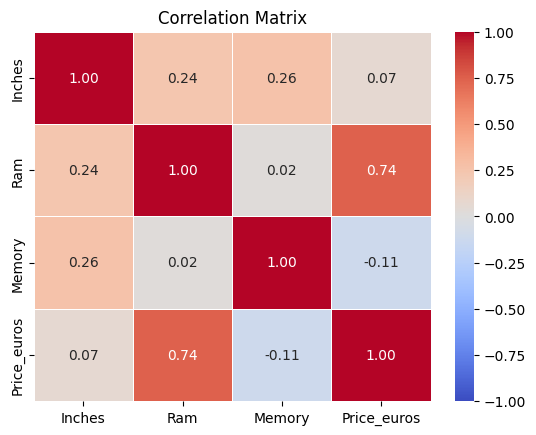

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
Helper.EDA(df)

# Task 2 - Data Cleaning

In [3]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
Helper.cleanData(df)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution_Width,Resolution_Height,MemoryType,PriceRange,CpuModel,GpuModel
0,1,1,300,4,13.3,1,8,128.0,2,8,1.37,1339.69,2560,1600,5,2,54,60
1,2,1,301,4,13.3,1,8,128.0,2,8,1.34,898.94,1440,900,0,1,52,53
2,3,7,50,3,15.6,1,8,256.0,2,4,1.86,575.00,1920,1080,5,0,63,55
3,4,1,300,4,15.4,1,16,512.0,0,8,1.83,2537.45,2880,1800,5,2,74,80
4,5,1,300,4,13.3,1,8,256.0,2,8,1.37,1803.60,2560,1600,5,2,56,61


# Task 3 - Feature Engineering

In [5]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
clean = CleanData()
clean.seperate_memory_type(df)
clean.formatResolution(df)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,MemoryType,Resolution_Width,Resolution_Height
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage,1440,900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,SSD,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,SSD,2560,1600


# Task 4 - Price Prediction (Regression)

In [7]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [8]:
Helper.cleanData(df)

(LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder())

In [9]:
X = df.drop(["Price_euros", "PriceRange"], axis=1)

In [10]:
y = df["Price_euros"]

In [11]:
reg_model = RegModel()

In [12]:
lr_mse, lr_rmse = reg_model.linearRegression(X, y)
rf_mse, rf_rmse = reg_model.randomForest(X, y)
gb_mse, gb_rmse = reg_model.gradientBoosting(X, y)

In [13]:
print("Linear Regression MSE: " + str(lr_mse) + "\nLinear Regression RMSE: " + str(lr_rmse) + "\nRandom Forest MSE: " + str(rf_mse) + 
      "\nRandom Forest RMSE: " + str(rf_rmse) + "\nGradient Boosting MSE: " + str(gb_mse) + "\nGradient Boosting RMSE: " + str(gb_rmse))

Linear Regression MSE: 181075.00512817502
Linear Regression RMSE: 425.52908846302745
Random Forest MSE: 115050.18559148678
Random Forest RMSE: 339.1904857030733
Gradient Boosting MSE: 104550.04774732742
Gradient Boosting RMSE: 323.341998118598


# Task 5 - Laptop Classification

In [15]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [16]:
Helper.cleanData(df)

(LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder())

In [17]:
X = df.drop(["Price_euros", "PriceRange"], axis=1)

In [18]:
y = df["PriceRange"]

In [19]:
cls_model = ClsModel()

In [20]:
lr_report = cls_model.logisticRegression(X, y)
rf_report = cls_model.randomForest(X, y)
gb_report = cls_model.gradientBoosting(X, y)

In [21]:
print("Logistic Regression Report: \n" + str(lr_report) + "\nRandom Forest Report: \n" + str(rf_report) + "\nGradient Boosting Report: \n" + str(gb_report))

Logistic Regression Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.60      0.64      0.62       129
           2       0.80      0.75      0.77       146

    accuracy                           0.74       391
   macro avg       0.74      0.74      0.74       391
weighted avg       0.74      0.74      0.74       391

Random Forest Report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       116
           1       0.74      0.73      0.73       129
           2       0.84      0.87      0.86       146

    accuracy                           0.83       391
   macro avg       0.83      0.83      0.83       391
weighted avg       0.83      0.83      0.83       391

Gradient Boosting Report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       116
           1       0.74      0.80      0.77       

# Task 6 - Clustering

In [22]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [23]:
Helper.cleanData(df)

(LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder())

In [24]:
X = df[["Inches", "Ram", "Memory", "Price_euros"]]

In [25]:
kmeans = KMeansCluster()

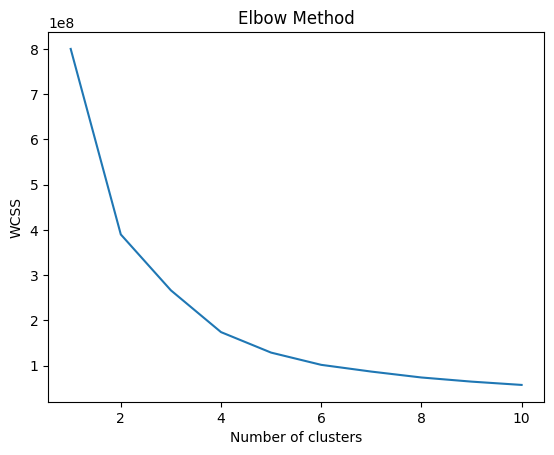

In [26]:
wcss = kmeans.find_optimal_k(X)

In [27]:
elbow = kmeans.calculate_optimal_k(wcss)
elbow = int(elbow)

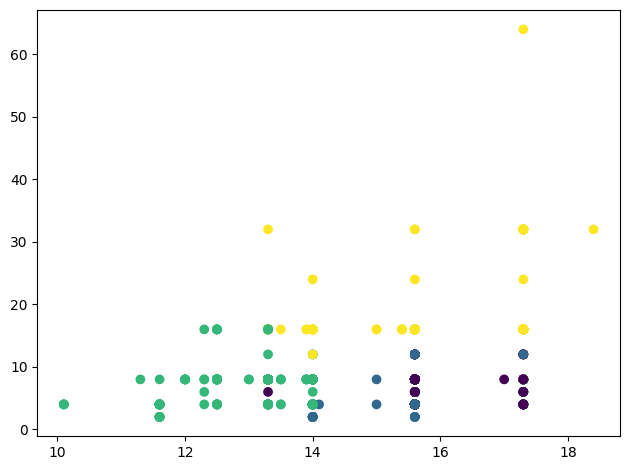

In [28]:
kmeans.kmeans(X, elbow)

# Task 7 - Brand Analysis

In [29]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
expData = ExpDataAnalysis(df)

In [30]:
clean = CleanData()
clean.formatScreenSize(df)
clean.clean_numeric_column(df, 'Ram', 'GB')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


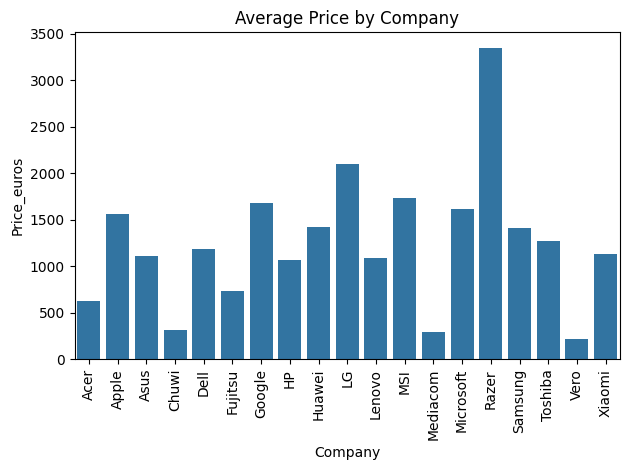

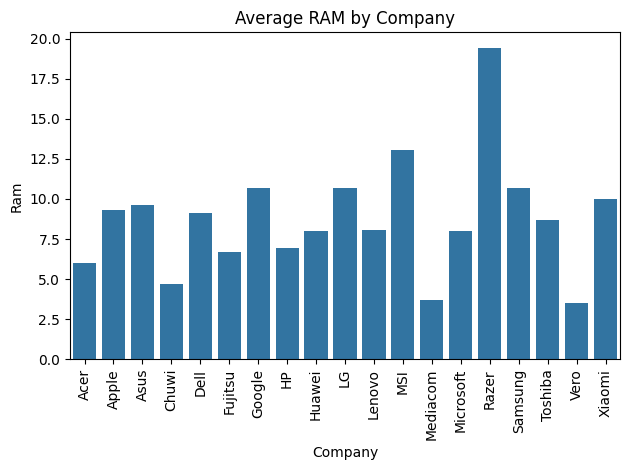

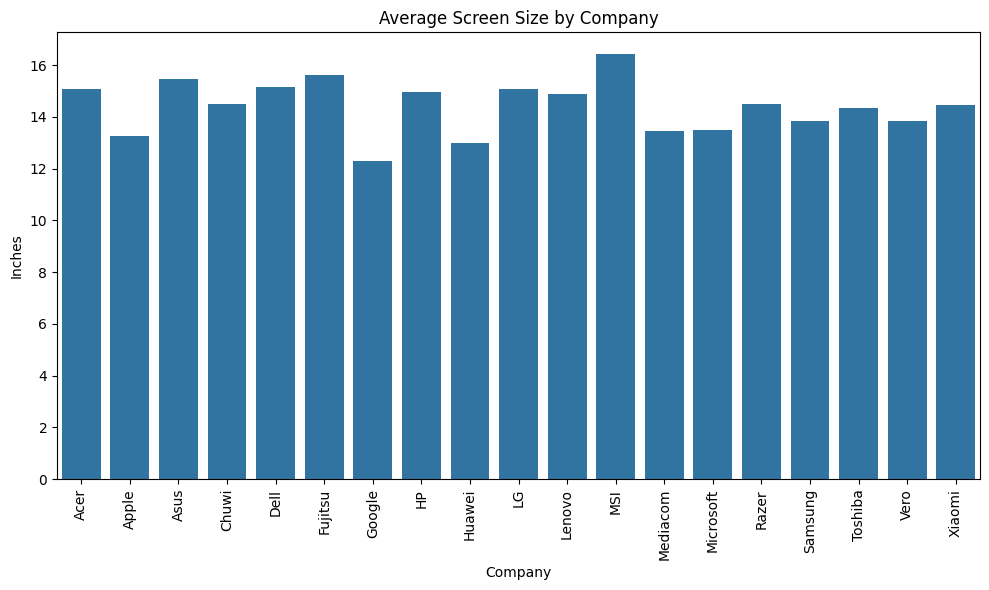

      Company  Price_euros        Ram     Inches
0        Acer   626.775825   5.980583  15.063107
1       Apple  1564.198571   9.333333  13.247619
2        Asus  1104.169367   9.594937  15.450000
3       Chuwi   314.296667   4.666667  14.500000
4        Dell  1186.068990   9.151515  15.136027
5     Fujitsu   729.000000   6.666667  15.600000
6      Google  1677.666667  10.666667  12.300000
7          HP  1067.774854   6.912409  14.943066
8      Huawei  1424.000000   8.000000  13.000000
9          LG  2099.000000  10.666667  15.066667
10     Lenovo  1086.384444   8.040404  14.872727
11        MSI  1728.908148  13.037037  16.442593
12   Mediacom   295.000000   3.714286  13.457143
13  Microsoft  1612.308333   8.000000  13.500000
14      Razer  3346.142857  19.428571  14.514286
15    Samsung  1413.444444  10.666667  13.822222
16    Toshiba  1267.812500   8.666667  14.354167
17       Vero   217.425000   3.500000  13.825000
18     Xiaomi  1133.462500  10.000000  14.450000


In [31]:
print(expData.brand_analysis())

# Task 8 - Feature Importance Analysis

In [32]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [33]:
Helper.cleanData(df)

(LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder())

In [34]:
X = df.drop(["Price_euros", "PriceRange"], axis=1)

In [35]:
y = df["Price_euros"]

In [36]:
reg_model = RegModel()

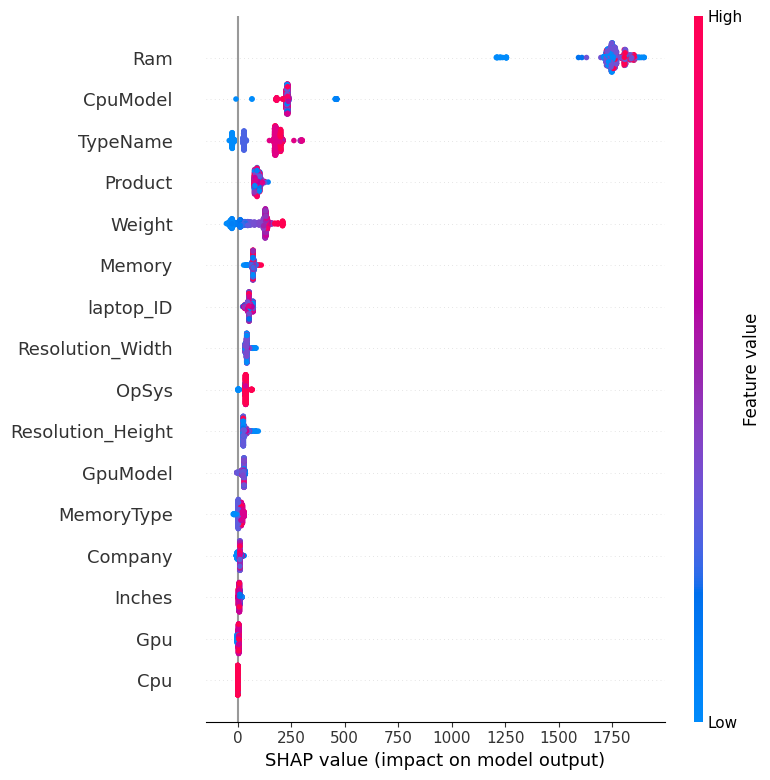

In [37]:
reg_model.randomForestSHAP(X,y)

# Task 9 - Price Trend Analysis

In [38]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [39]:
clean = CleanData()
df = clean.seperate_cpu_type(df)
df = clean.seperate_gpu_type(df)
processor_price_trend = df.groupby('Cpu')['Price_euros'].mean()
gpu_price_trend = df.groupby('Gpu')['Price_euros'].mean()
ram_price_trend = df.groupby('Ram')['Price_euros'].mean()

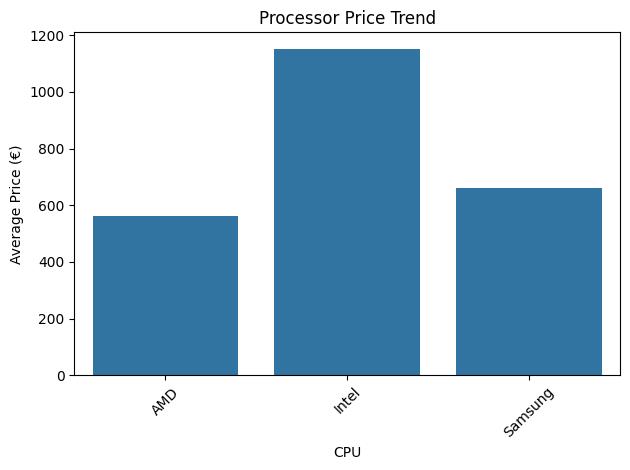

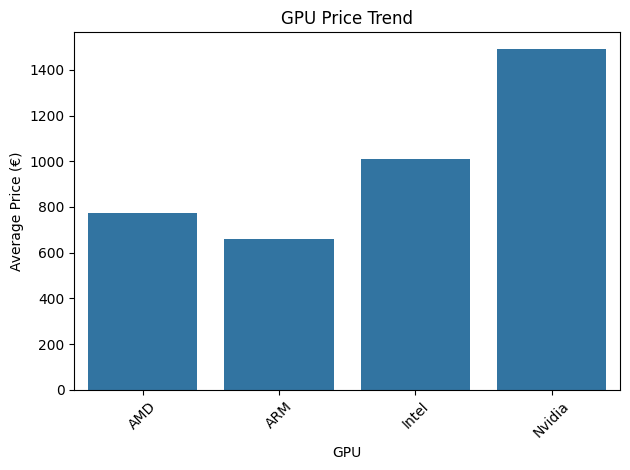

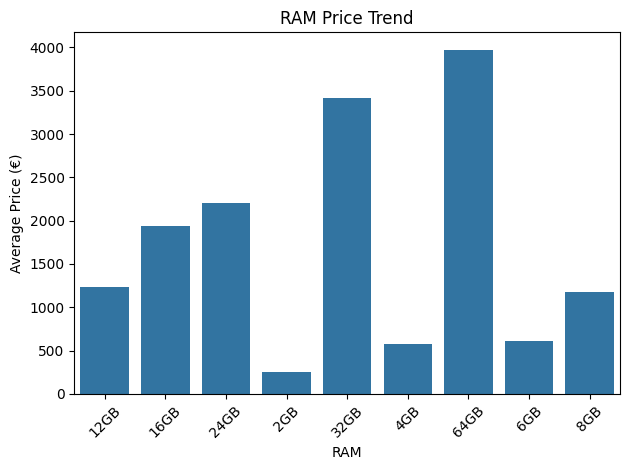

In [40]:
Helper.plot_price_trends(processor_price_trend, gpu_price_trend, ram_price_trend)

# Task 10 - Recommendation System

In [41]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [43]:
le_company, le_product, le_typeName, le_cpu, le_cpuModel, le_gpu, le_gpuModel, le_opsys, le_memoryType = Helper.cleanData(df)

In [44]:
user_preferences = {
    'Price_euros': 1200,
    'Ram': 16,
    'Cpu': 'Intel',
    'Gpu': 'Nvidia',
    'Inches': 15,
}

In [45]:
user_vector = np.array([
    user_preferences['Price_euros'],
    user_preferences['Ram'],
    user_preferences['Inches'],
    le_cpu.transform([user_preferences['Cpu']])[0],
    le_gpu.transform([user_preferences['Gpu']])[0]
]).reshape(1,-1)

In [46]:
original_df = pd.read_csv("laptop_price.csv", encoding='latin1')
Helper.get_similar_laptops_by_id(user_vector, user_preferences, df, original_df)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
329,335,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2639.0
491,498,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0
1066,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.0
